## **Model fitting example**

- add transformation function for trend plots
- check GMST trend plot - doesn't match 

In [14]:
import sys; sys.path.append('/home/clair/wwa')
from wwa import *
from wwa_nonstationary_fitting import *

In [2]:
pr = pd.read_csv("ts/EA-drought_pr-mam_chirps05+centrends01.dat", comment = "#", sep = " ", names = ["year", "pr_mam"], index_col = 0)
gmst = pd.read_csv("../90_data/gmst.dat", comment = "#", sep = " .", engine = "python", header = None, names = ["year","gmst"], index_col = "year")

df = pd.merge(pr, gmst, left_index = True, right_index = True)

fit_normal = ns_fit(norm, "fixeddisp", df, "gmst", "pr_mam")

event_cov = df.loc[2022, "gmst"]

df["log10_pr"] = np.log10(df["pr_mam"])

fit_lognormal = ns_fit(norm, "fixeddisp", df, "gmst", "log10_pr")

def pr_conv(x): return(10**x)

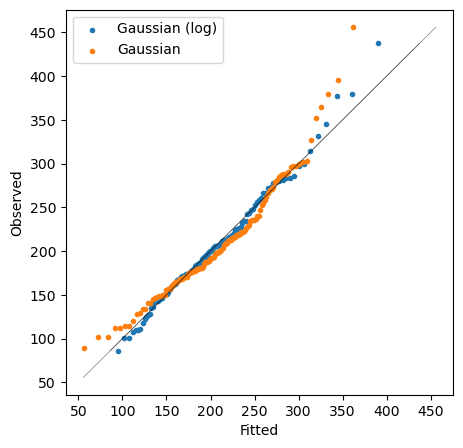

In [3]:
ns_qqplot(fit_lognormal, event_cov, label = "Gaussian (log)", transform = pr_conv)
ax = plt.gcf().axes[0]
ns_qqplot(fit_normal, event_cov, label = "Gaussian", ax = ax)

ax.legend()

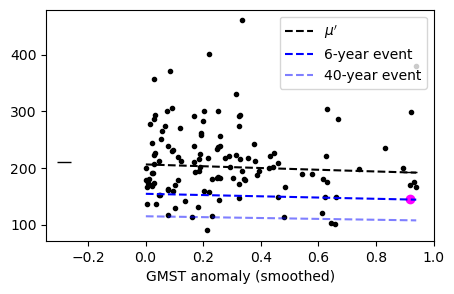

In [4]:
trendplot(fit_lognormal, cov1 = event_cov, cov2 = event_cov - 1.2, lower = True, transform = pr_conv)
plt.legend()

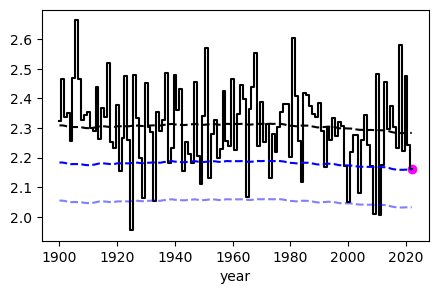

In [54]:
time_trendplot(fit_lognormal, lower = True, transform = pr_conv)

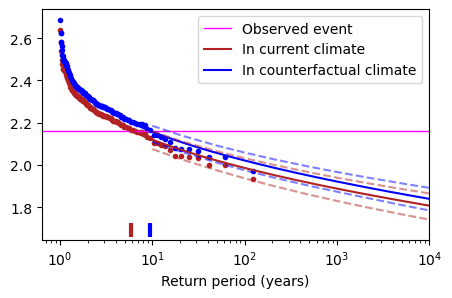

In [56]:
rlplot(fit_lognormal, cov1 = event_cov, cov2 = event_cov - 1.2, event_value = df.loc[2022, "log10_pr"], lower = True)

In [11]:
pd.DataFrame(model_results(fit_lognormal, cov1 = event_cov, cov2 = event_cov - 1.2, 
                           event_value = df.loc[2022, "log10_pr"], lower = True, rp = 20),
             index = [0])

,mu,sigma,alpha,loc1,scale1,disp1,loc2,scale2,disp2,fixed_value,rp_1,rp_2,pr,fixed_rp,rl_1,rl_2,dI,nll
0,2.314596,0.12975,-0.033937,2.283698,0.128017,0.056057,2.324234,0.13029,0.056057,2.161037,5.917421,9.507377,1.606676,20,2.073128,2.109926,-0.036799,-77.166381
